## Downloading dataset

## Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://trello-attachments.s3.amazonaws.com/5e7ab7849f172231e1d8b386/5e7d5e0fec43d718240c71c7/cbf8668259455adfbabd3f686e410b41/incidencia_delictiva_jalisco18-19_filter.csv')
df

,Año,Número_mes,Mes,Clave_Mun,Municipio,Localidad,Colonia,Delito,Cantidad
0,2018,1,Enero,1,ACATIC,CABECERA MUNICIPAL,LA VILLA,ROBO CASA HABITACION,1
1,2018,1,Enero,1,ACATIC,CABECERA MUNICIPAL,AGUA BLANCA,VIOLENCIA FAMILIAR,1
2,2018,1,Enero,1,ACATIC,CABECERA MUNICIPAL,CENTRO CAB. MUN.,LESIONES DOLOSAS,1
3,2018,1,Enero,1,ACATIC,CABECERA MUNICIPAL,CENTRO CAB. MUN.,VIOLENCIA FAMILIAR,1
4,2018,1,Enero,1,ACATIC,TIERRAS COLORADAS,N.D.,ROBO DE MOTOCICLETA,1
...,...,...,...,...,...,...,...,...,...
98786,2019,12,Diciembre,125,SAN IGNACIO CERRO GORDO,CABECERA MUNICIPAL,CENTRO CAB. MUN.,ROBO A VEHICULOS PARTICULARES,1
98787,2019,12,Diciembre,999,N.D.,N.D.,N.D.,VIOLENCIA FAMILIAR,10
98788,2019,12,Diciembre,999,N.D.,N.D.,N.D.,ROBO CASA HABITACION,2
98789,2019,12,Diciembre,999,N.D.,N.D.,N.D.,ROBO A VEHICULOS PARTICULARES,3


In [ ]:
municipalities = ["GUADALAJARA", "ZAPOPAN", "SAN PEDRO TLAQUEPAQUE"]

gdl_metro_area = df[df["Municipio"].isin(municipalities)]

In [ ]:
gdl_metro_area["Localidad"].value_counts()

N.D.                                     56962
EL BAJIO                                     7
LA MOJONERA                                  7
LOS ROBLES                                   6
COPALITA                                     6
RIO BLANCO                                   4
MESA COLORADA                                4
LAS AGUJAS                                   2
AGUA ESCONDIDA                               2
LOS GAVILANES                                2
SAN LORENZO                                  2
HUAXTLA                                      2
GU                                           1
N.S.                                         1
RANCHO LOS SEVILLAS                          1
EL RESUMIDERO                                1
VIA PUBLICA                                  1
EL LAZO (EX-HACIENDA DE EL LAZO)             1
TL                                           1
LOS LAURELES                                 1
PUERTA DE VELAZQUEZ (PASEO DEL OESTE)        1
SANTA PAULA  

In [ ]:
gdl_metro_area["Colonia"].value_counts()

N.D.                      710
MIRAVALLE                 285
ALAMO INDUSTRIAL          244
JARDS. DE LA PAZ          239
GUADALUPANA               237
                         ... 
CIRCUNVALACION OBLATOS      1
HDA. DEL CAMICHIN 8470      1
NUEVO AMANECER 2            1
LA JUNTA DE LOS OCOTES      1
ARGENTA MIRADOR RES.        1
Name: Colonia, Length: 1304, dtype: int64

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

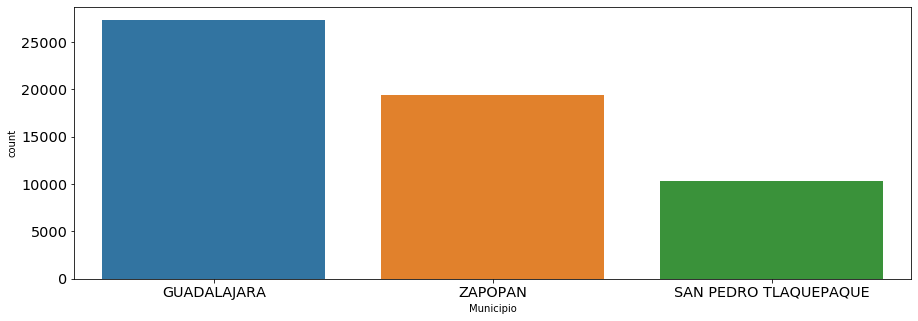

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Municipio", data=gdl_metro_area, order = gdl_metro_area['Municipio'].value_counts().index)

plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='x-large'
)

Dividir por cantidad de habitantes

<Figure size 1080x360 with 0 Axes>

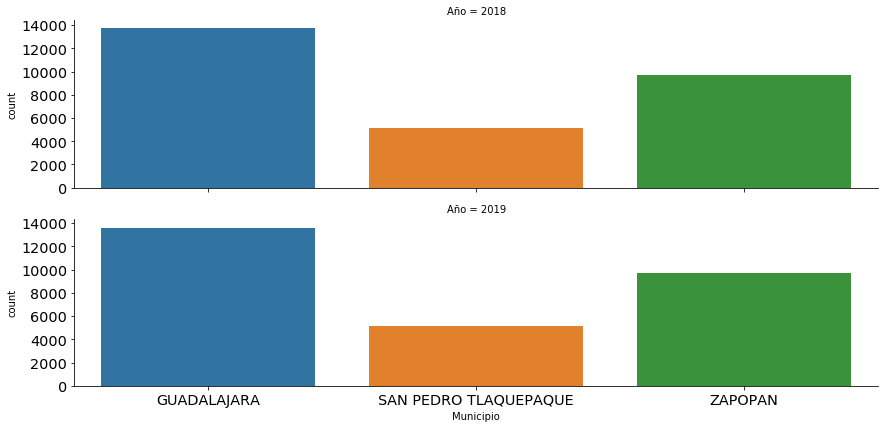

In [ ]:
plt.figure(figsize=(15,5))

chart = sns.catplot(
    x="Municipio",
    kind="count",
    data=gdl_metro_area,
    row="Año",
    aspect=4,
    height=3
)


plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

for axes in chart.axes.flat:
    axes.set_yticklabels(axes.get_yticklabels(), fontweight='light', fontsize='x-large')

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text yticklabel objects>)

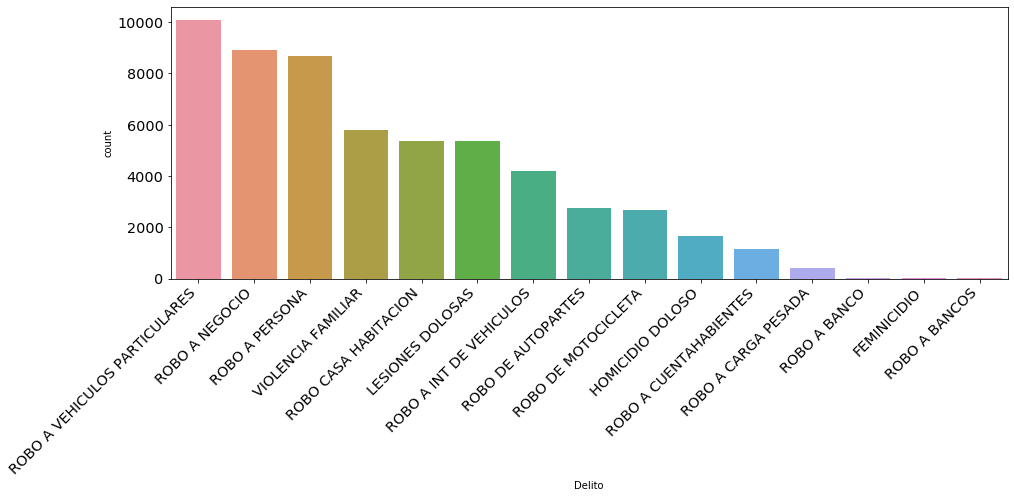

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Delito", data=gdl_metro_area, order = gdl_metro_area['Delito'].value_counts().index)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='x-large'
)

Calcular porcentaje de cambio = cant 2019 - cant 2018 / cant 2018
Factor de corrección estadístico (técnicas de muestreo y estimación)

<Figure size 1080x360 with 0 Axes>

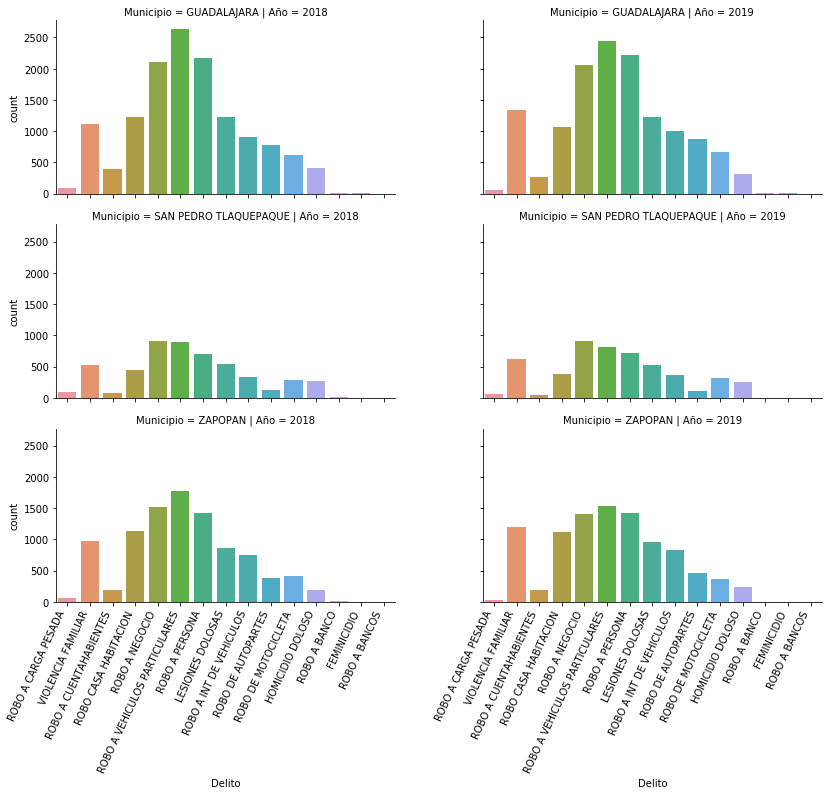

In [ ]:
plt.figure(figsize=(15,5))

chart = sns.catplot(
    x="Delito",
    kind="count",
    data=gdl_metro_area,
    row="Municipio",
    col="Año",
    aspect=2,
    height=3
)


for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')